<a href="https://colab.research.google.com/github/asafuM-56/test-2/blob/main/Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the Dataset
import pandas as pd

# Loading the Dataset using the file path method
file_path = '/content/Test2_dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

print(df.head())  # Print the first few rows of the DataFrame
print(df.describe())

             Catalyst  Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  \
0         Ni−SiO2‑550                  0.15                   650        10.0   
1         Ni−SiO2‑750                  0.15                   650        10.0   
2   Ni/Sn0.2−SiO2‑550                  0.15                   650        10.0   
3   Ni/Sn0.2−SiO2‑750                  0.15                   650        10.0   
4  Ni/Sn0.05−SiO2‑550                  0.15                   650        10.0   

   Reaction Time  Pore Size  Pore Volume  Surface Area  \
0            0.5        4.7         0.58         476.0   
1            0.5        4.7         0.58         476.0   
2            0.5        5.2         0.58         455.0   
3            0.5        5.2         0.58         455.0   
4            0.5        4.8         0.82         599.0   

   H2-TPR Peak Temperature  Ni Particle Size  Ni Dispersion  \
0                    640.0               2.9            NaN   
1                    640.0            

Check data types

In [ ]:
# Get the data types of each column
data_types = df.dtypes

# Print the data types
print(data_types)

Catalyst                       object
Ratio of CH4 in Feed          float64
Reaction Temperature            int64
Ni Loading                    float64
Reaction Time                 float64
Pore Size                     float64
Pore Volume                   float64
Surface Area                  float64
H2-TPR Peak Temperature       float64
Ni Particle Size              float64
Ni Dispersion                 float64
Modifier Electronegativity    float64
GHSV                            int64
CH4 Conversion                float64
CO2 Conversion                float64
Syngas_Ratio                  float64
dtype: object


Sorting into Numerical and Categorical Columns

In [ ]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)


Numeric columns: Index(['Ratio of CH4 in Feed', 'Reaction Temperature', 'Ni Loading',
       'Reaction Time', 'Pore Size', 'Pore Volume', 'Surface Area',
       'H2-TPR Peak Temperature', 'Ni Particle Size', 'Ni Dispersion',
       'Modifier Electronegativity', 'GHSV', 'CH4 Conversion',
       'CO2 Conversion', 'Syngas_Ratio'],
      dtype='object')

Categorical columns: Index(['Catalyst'], dtype='object')


Look for missing data

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Catalyst                         0
Ratio of CH4 in Feed             0
Reaction Temperature             0
Ni Loading                       0
Reaction Time                    0
Pore Size                        0
Pore Volume                      0
Surface Area                     0
H2-TPR Peak Temperature          0
Ni Particle Size                 0
Ni Dispersion                 1056
Modifier Electronegativity       0
GHSV                             0
CH4 Conversion                  49
CO2 Conversion                  77
Syngas_Ratio                    76
dtype: int64


Will fill Ni dispersion with the mean, and drop the missing values in CH4 Conversion, CO2 Conversion, and Syngas Ratio as those are our targets.

In [ ]:
# Replace missing values in numeric columns with the mean
df['Ni Dispersion'] = df['Ni Dispersion'].fillna(df['Ni Dispersion'].mean())

#Drop rows with missing values in CH4 Conversion, CO2 Conversion, and Syngas Ratio
df = df.dropna()

# Verify that missing values have been removed
missing_values_after_cleaning = df.isnull().sum()
print("\nMissing values after cleaning:\n", missing_values_after_cleaning)


Missing values after cleaning:
 Catalyst                      0
Ratio of CH4 in Feed          0
Reaction Temperature          0
Ni Loading                    0
Reaction Time                 0
Pore Size                     0
Pore Volume                   0
Surface Area                  0
H2-TPR Peak Temperature       0
Ni Particle Size              0
Ni Dispersion                 0
Modifier Electronegativity    0
GHSV                          0
CH4 Conversion                0
CO2 Conversion                0
Syngas_Ratio                  0
dtype: int64


Encoding Categorical Variables

In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Print the encoded DataFrame
print(df_encoded.head())

   Ratio of CH4 in Feed  Reaction Temperature  Ni Loading  Reaction Time  \
0                  0.15                   650        10.0            0.5   
1                  0.15                   650        10.0            0.5   
2                  0.15                   650        10.0            0.5   
3                  0.15                   650        10.0            0.5   
4                  0.15                   650        10.0            0.5   

   Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
0        4.7         0.58         476.0                    640.0   
1        4.7         0.58         476.0                    640.0   
2        5.2         0.58         455.0                    457.0   
3        5.2         0.58         455.0                    457.0   
4        4.8         0.82         599.0                    558.0   

   Ni Particle Size  Ni Dispersion  ...  Catalyst_Y–2%Nd2O3  \
0               2.9       9.886117  ...               False   
1       

Generating the Summary Statistics of the dataset

In [ ]:
print(df.describe())

       Ratio of CH4 in Feed  Reaction Temperature   Ni Loading  Reaction Time  \
count           1564.000000           1564.000000  1564.000000    1564.000000   
mean               0.367585            706.496164     9.399282      16.470203   
std                0.144626             86.554873     5.878498      22.922719   
min                0.060000            400.000000     0.300000       0.100000   
25%                0.250000            650.000000     5.000000       0.500000   
50%                0.400000            700.000000     9.600000       7.000000   
75%                0.500000            750.000000    10.325000      24.000000   
max                0.500000           1000.000000    60.000000     200.000000   

         Pore Size  Pore Volume  Surface Area  H2-TPR Peak Temperature  \
count  1564.000000  1564.000000   1564.000000              1564.000000   
mean     11.367923     0.407289    192.735177               641.356803   
std      10.677979     0.293474    175.739999   

Checking for outliers

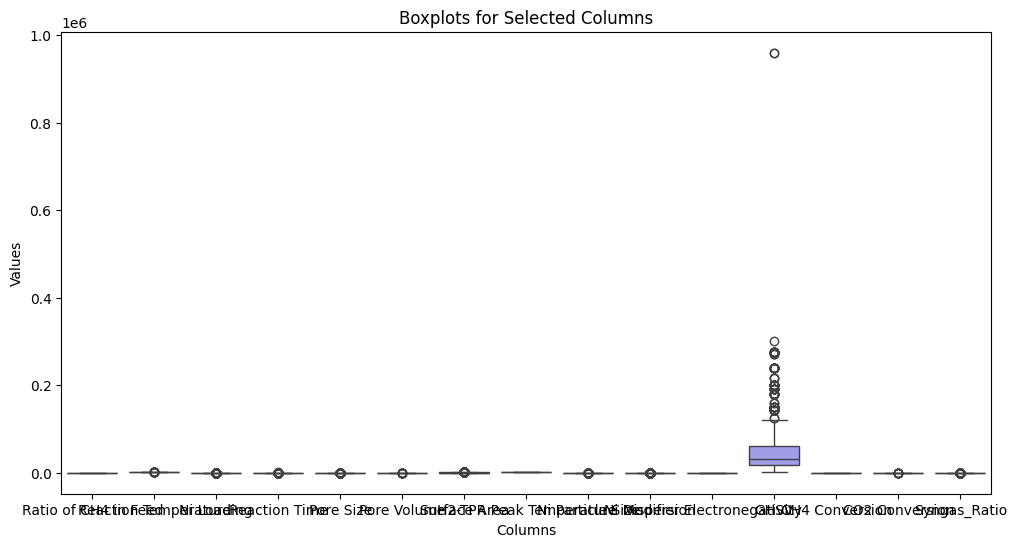

Outliers detected in the following columns:
Ratio of CH4 in Feed            0
Reaction Temperature           29
Ni Loading                    149
Reaction Time                  92
Pore Size                     113
Pore Volume                    20
Surface Area                  134
H2-TPR Peak Temperature         0
Ni Particle Size               81
Ni Dispersion                 594
Modifier Electronegativity      0
GHSV                          114
CH4 Conversion                  0
CO2 Conversion                  9
Syngas_Ratio                  104
dtype: int64


In [ ]:
#Looking for outliers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the interquartile range (IQR) for each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers = (df[numeric_cols] < (Q1 - outlier_threshold)) | (df[numeric_cols] > (Q3 + outlier_threshold))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df[numeric_cols], ax=ax)

# Set labels and title
ax.set_title('Boxplots for Selected Columns')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

plt.show()

# Check if outliers exist
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum())
else:
    print("No outliers detected.")

Removing rows with outliers that are not in Syngas Ratio or CO2 Conversion. Also will not remove the outliers in Ni Dispersion since that column has been filled with the mean.

In [ ]:
# Define the columns to check for outliers
columns_of_interest = ['Ni Loading', 'Reaction Time', 'Pore Size', 'Pore Volume', 'Surface Area', 'Ni Particle Size', 'GHSV', 'Reaction Temperature']

# Function to detect outliers using IQR
def remove_outliers_iqr(df, columns):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    outliers = (df[columns] < lower_bound) | (df[columns] > upper_bound)
    return df[~outliers]

# Remove outliers and store the result in a new DataFrame
df = remove_outliers_iqr(df, columns_of_interest)

Making a Correlation Matrix and Heatmap for the dataset

                            Ratio of CH4 in Feed  Reaction Temperature  \
Ratio of CH4 in Feed                    1.000000              0.034519   
Reaction Temperature                    0.034519              1.000000   
Ni Loading                              0.063692             -0.051901   
Reaction Time                          -0.027747              0.246631   
Pore Size                              -0.033474             -0.000785   
Pore Volume                             0.046350             -0.043311   
Surface Area                            0.120237             -0.026529   
H2-TPR Peak Temperature                -0.023153              0.060556   
Ni Particle Size                       -0.057713              0.048960   
Ni Dispersion                          -0.027532             -0.014445   
Modifier Electronegativity             -0.028599             -0.015706   
GHSV                                   -0.080444              0.074676   
CH4 Conversion                        

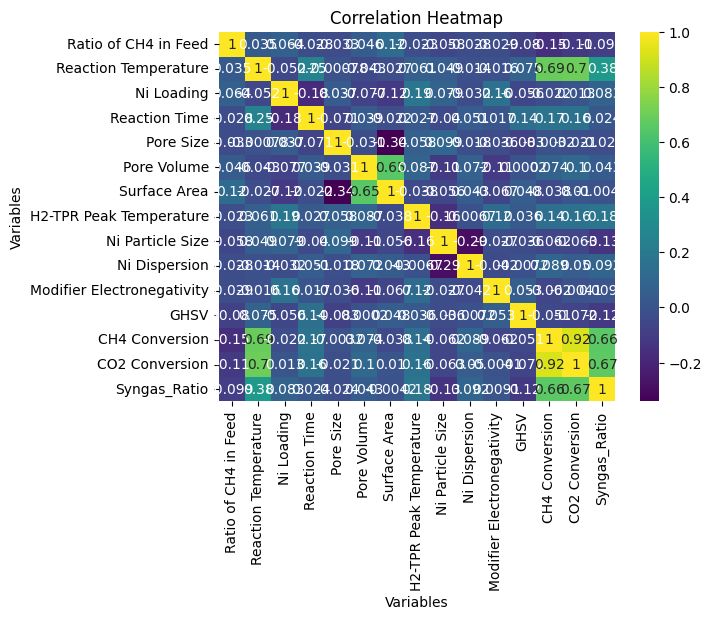

In [ ]:
import pandas as pd
import numpy as np

#Make the correlation matrix
correlation_matrix = df_encoded[numeric_cols].corr()
print(correlation_matrix)

#Making the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

# Set the title and labels
plt.title("Correlation Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Show the plot
plt.show()

Visualizing data relation using a pairplot

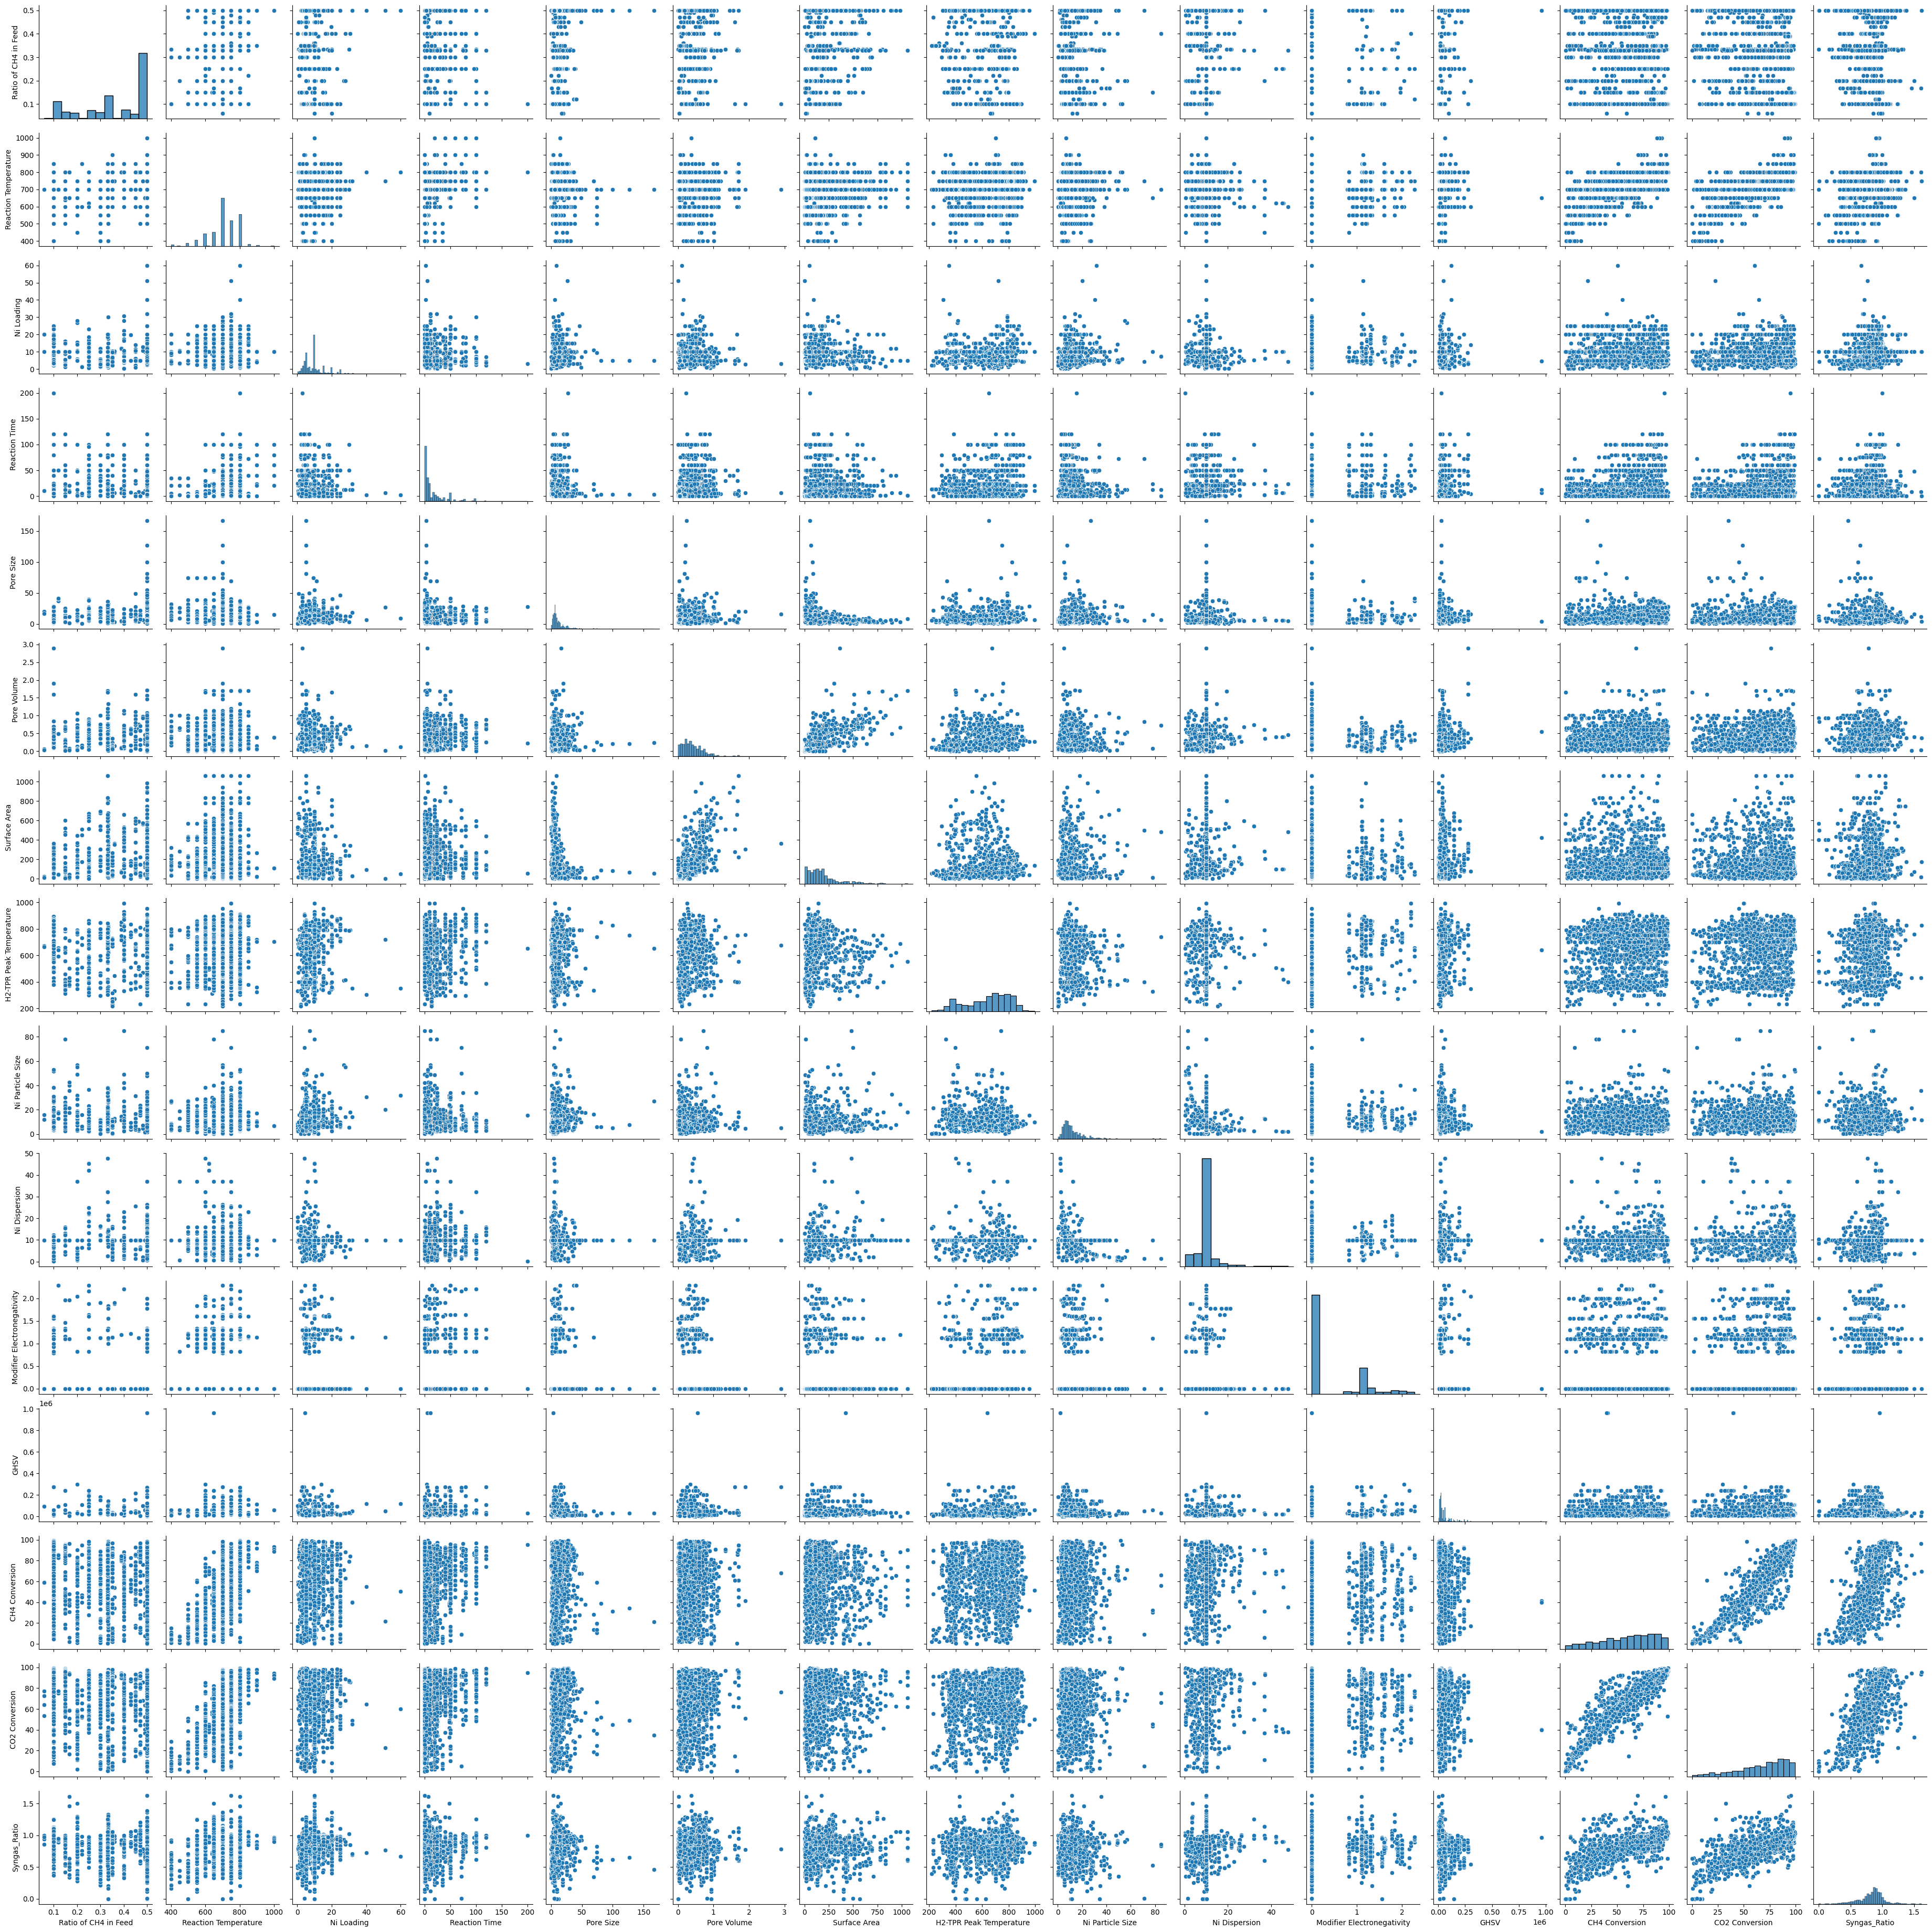

In [ ]:
# Create a scatter plot matrix
sns.pairplot(df_encoded[numeric_cols])

# Show the plot
plt.show()

The stongest correlations are between the three targets, CH4 Conversion, CO2 Conversion, and Syngas Ratio. Reaction Temperature has a strong correlation to both CH4 and CO2 conversion

Not many other variables have any meaningful correlation to the three targets